In [1]:
from qiskit import *
# Warning: you need to have utils.py in the notebook working directory
# You can se it with !pwd and change it with !cd (or using os module)
%run utils.py
from qiskit.visualization import plot_histogram

In [2]:
ufunc = QuantumCircuit(3)
ufunc.x(0)
ufunc.i(1)
ufunc.h(-1)
ufunc.ccx(0, 1, 2)
ufunc.x(0)
ufunc.i(1)
ufunc.h(-1)
measurer = QuantumCircuit(3)
measurer.measure_all()

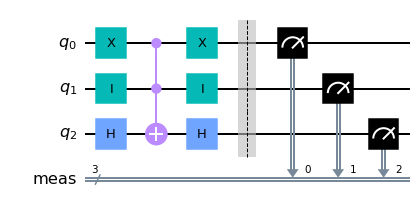

In [3]:
oracle = measurer.compose(ufunc, qubits=range(3), front=True)
oracle.draw()

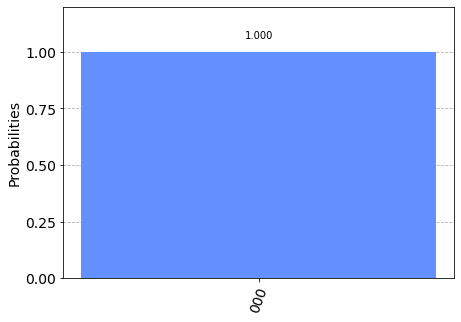

In [4]:
counts = simulate(oracle)
plot_histogram(counts)

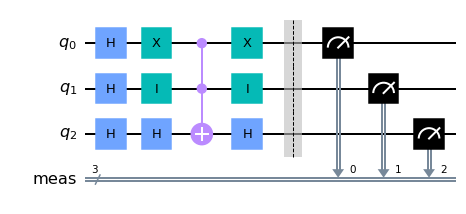

In [5]:
hadamard = QuantumCircuit(3)
hadamard.h(range(3))
oracle = oracle.compose(hadamard, qubits=range(3), front=True)
oracle.draw()

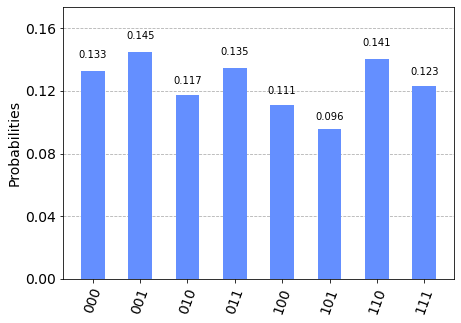

In [6]:
counts = simulate(oracle)
plot_histogram(counts)

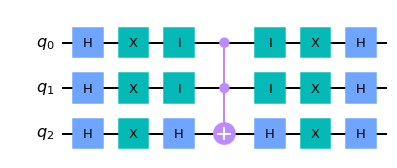

In [7]:
diffuser = QuantumCircuit(3)
diffuser.h(range(3))
diffuser.x(range(3))
diffuser.h(-1)
diffuser.i(range(2))
diffuser.ccx(0, 1, 2)
diffuser.h(-1)
diffuser.i(range(2))
diffuser.x(range(3))
diffuser.h(range(3))
diffuser.draw()

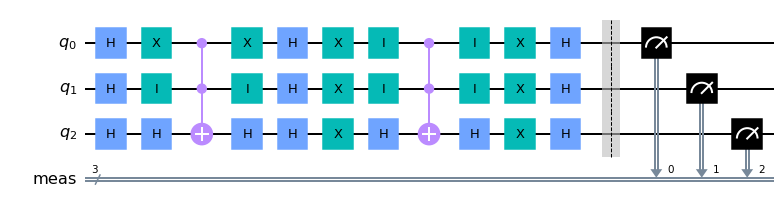

In [8]:
groover = hadamard.compose(ufunc, qubits=range(3))
groover = groover.compose(diffuser, qubits=range(3))
groover = measurer.compose(groover, qubits=range(3), front=True)
groover.draw()

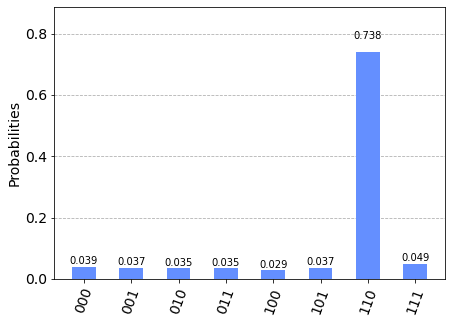

In [10]:
counts = simulate(groover)
plot_histogram(counts)